C:\ProgramData\Anaconda3\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


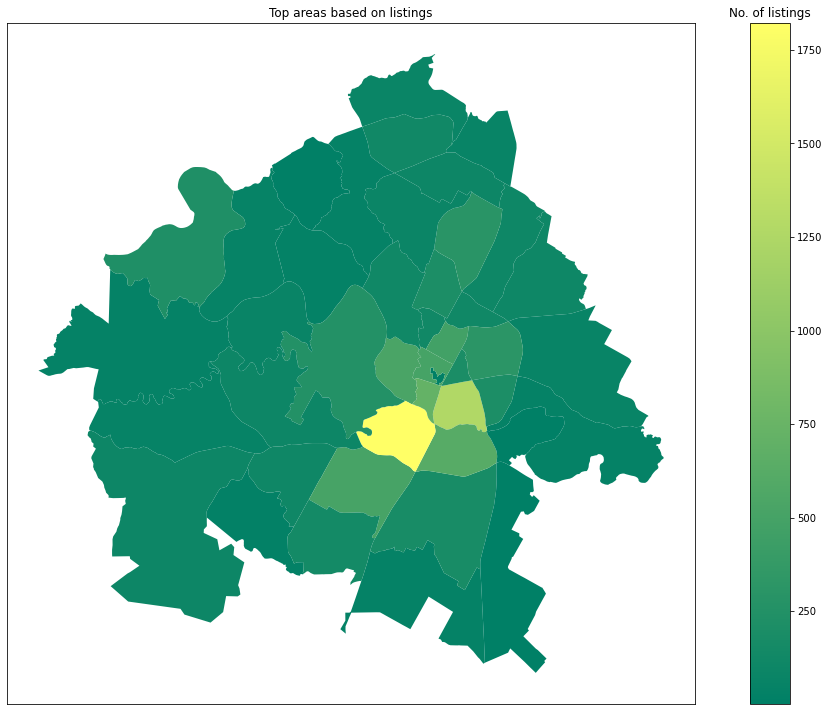

Rank,neighbourhood,geometry,listings
1,78704,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ...",1822
2,78702,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ...",1263
3,78701,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",713
4,78741,"MULTIPOLYGON (((-97.70652 30.25024, -97.70628 ...",622
5,78703,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ...",530
6,78745,"MULTIPOLYGON (((-97.79207 30.23183, -97.78922 ...",513
7,78705,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ...",505
8,78751,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ...",478
9,78723,"MULTIPOLYGON (((-97.66540 30.28564, -97.66595 ...",313
10,78758,"MULTIPOLYGON (((-97.71223 30.34801, -97.71246 ...",298


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

listings = pd.read_csv("../Data/listings.csv")
neighbourhoods = gpd.read_file("../Data/neighbourhoods.geojson")

list_counts = pd.DataFrame(listings.neighbourhood.value_counts())
list_counts.reset_index(inplace = True)
list_counts = list_counts.rename(columns = {'index':'neighbourhood', 'neighbourhood':'listings'})

a = list(neighbourhoods.neighbourhood.unique().astype(int))
so = {}
for i in range(len(a)):
    so[a[i]] = i

list_counts = list_counts.sort_values(by=['neighbourhood'], key=lambda x: x.map(so)).reset_index(drop = True)
neighbourhoods['listings'] = list_counts['listings']

fig, ax = plt.subplots(1, 1, figsize = (15,15))
ax.title.set_text('Top areas based on listings')
ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad = 0.01)
lk = {'orientation': "vertical"}
neighbourhoods.plot(column = 'listings', ax = ax, cax = cax, cmap = 'summer', legend = True, legend_kwds = lk)
plt.title("No. of listings")
plt.show()

top_areas = neighbourhoods.sort_values(by = ['listings'], ascending = False).reset_index(drop = True)[['neighbourhood', 'geometry', 'listings']]
top_areas.index = top_areas.index + 1
top_areas.columns.name = 'Rank'
top_areas[:10]

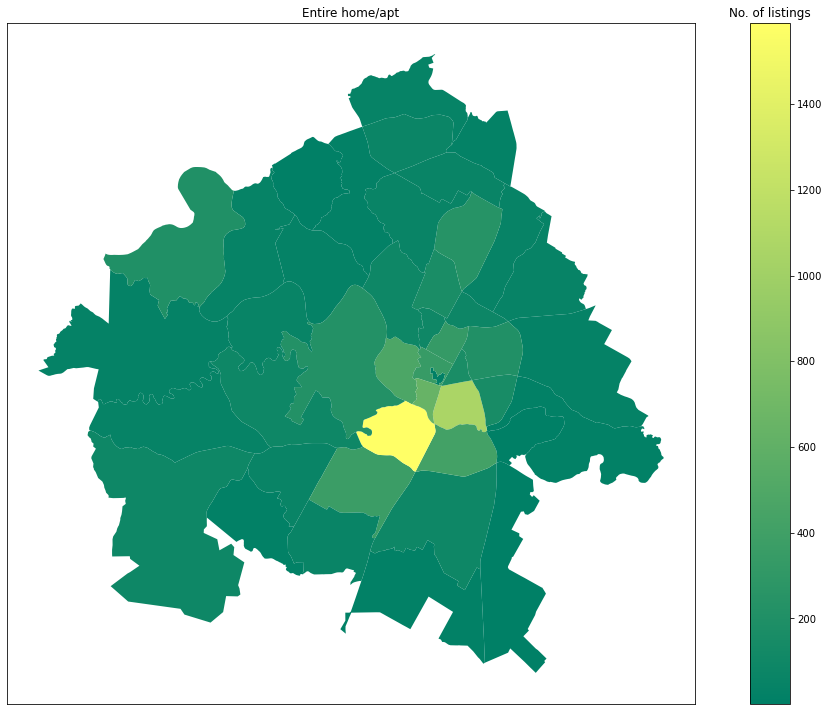

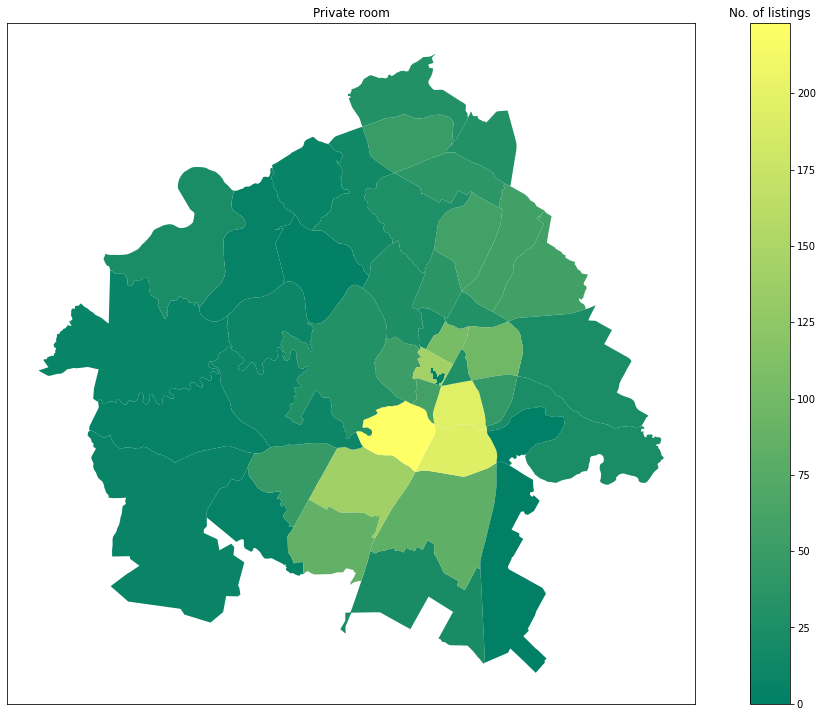

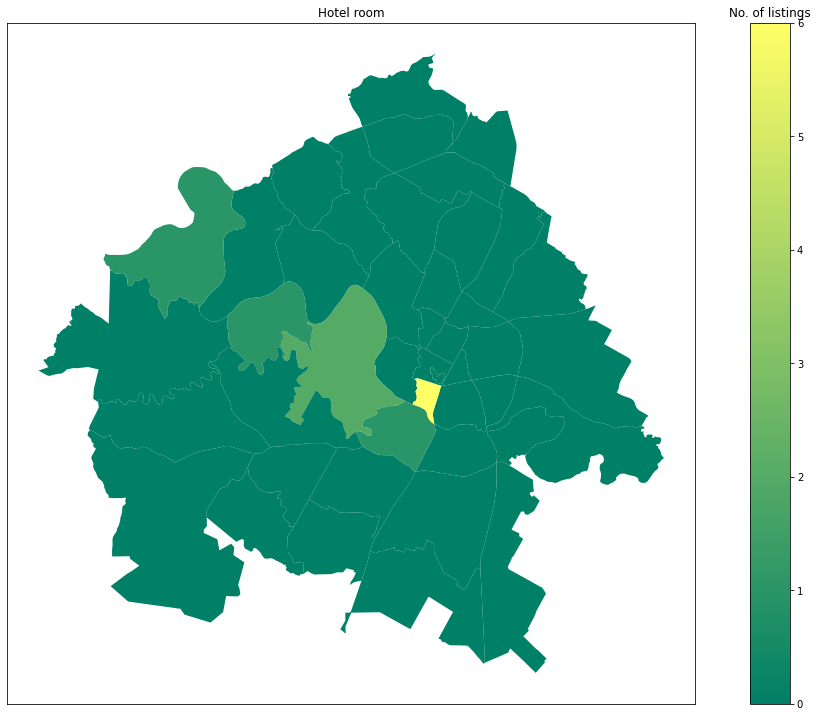

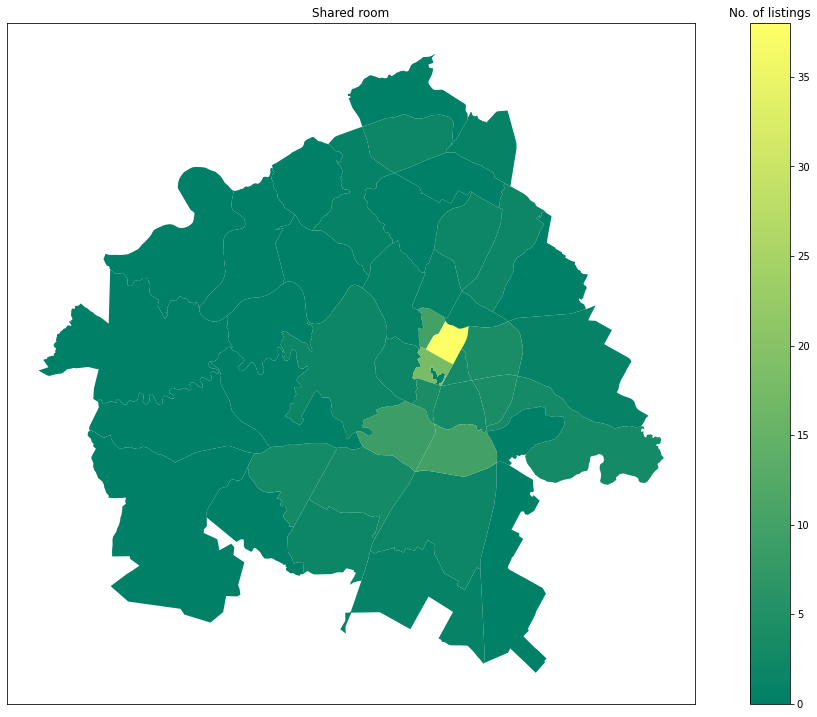

In [2]:
def thematic(room):
    a = list(neighbourhoods.neighbourhood.unique().astype(int))
    so = {}
    for i in range(len(a)):
        so[a[i]] = i
    
    list_counts = []
    for neigh in a:
        list_counts.append(listings[listings['room_type'] == room].neighbourhood.tolist().count(neigh))

    neighbourhoods['listings'] = list_counts

    fig, ax = plt.subplots(1, 1, figsize = (15,15))
    ax.title.set_text(room)
    ax.tick_params(
        axis='both', bottom=False, left=False,         
        labelbottom=False, labelleft=False)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad = 0.01)
    lk = {'orientation': "vertical"}
    neighbourhoods.plot(column = 'listings', ax = ax, cax = cax, cmap = 'summer', legend = True, legend_kwds = lk)
    plt.title("No. of listings")
    plt.show()

room_types = listings.room_type.unique().tolist()

for room in room_types:
    thematic(room)

In [3]:
#print(listings.sort_values(by = ['calculated_host_listings_count'], ascending = False)['host_name'].unique()[:10].tolist())
top_hosts = listings.sort_values(by = ['calculated_host_listings_count'], ascending = False)['host_name'].unique()[:10].tolist()
for i in range(len(top_hosts)):
    print(i+1, top_hosts[i])

1 Kia
2 WanderJaunt
3 TurnKey Vacation Rentals
4 Martin
5 Renters Club
6 Madalynn
7 Christian
8 Above
9 Lodgewell
10 Evolve Vacation Rental


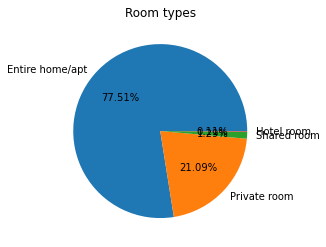

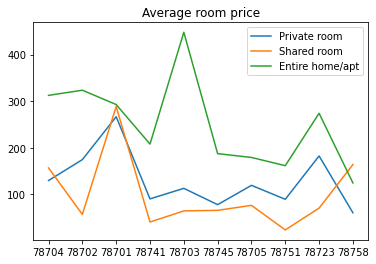

neighbourhood,Entire home/apt,Hotel room,Private room,Shared room
78704,312.499056,0.000000,129.659193,156.777778
78702,323.616901,NaN,174.589744,57.000000
78701,292.787267,293.666667,266.677966,288.500000
78741,207.925837,NaN,90.278351,40.600000
78703,448.012632,NaN,112.943396,64.500000
78745,187.424324,NaN,77.900000,65.666667
78705,179.237681,NaN,119.359155,76.444444
78751,161.597015,NaN,89.457143,23.684211
78723,274.071090,NaN,182.418367,70.500000
78758,124.525210,NaN,60.465517,164.000000


In [4]:
plt.pie(listings.room_type.value_counts(), autopct = '%.2f%%', labels=listings.room_type.value_counts().index)
plt.title("Room types")
plt.show()

avg_price = {}
for neigh in top_areas['neighbourhood'][:10]:
    avg_price[neigh] = listings[listings['neighbourhood'] == int(neigh)].groupby('room_type').mean().price
avg_prices_df = pd.DataFrame(avg_price).T
avg_prices_df.columns.name = 'neighbourhood'

plt.plot(avg_prices_df['Private room'], label = 'Private room')
plt.plot(avg_prices_df['Shared room'], label = 'Shared room')
plt.plot(avg_prices_df['Entire home/apt'], label = 'Entire home/apt')
plt.title("Average room price")
plt.legend()
plt.show()

avg_prices_df

# Insights

### Type of listings

Most listings are for the entire home/apt, and a few are for private rooms. Shared rooms and hotel rooms are the least common

### Price of rooms in top neighbourhoods

The rooms are more expensive in locations with higher number of listings on an average. (There are a few exceptions)